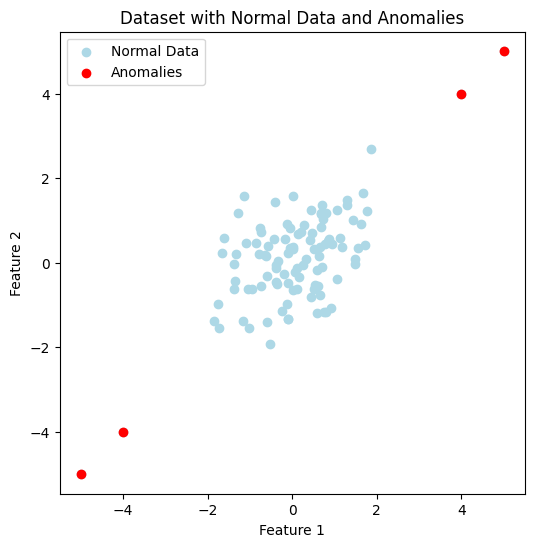

array([[-0.36103492, -0.49929923],
       [-1.32242966,  0.2006002 ],
       [ 0.31985125,  0.08571429],
       [-1.75135578, -0.98392105],
       [ 0.13529672,  0.67785677],
       [ 0.63419637,  0.16846662],
       [ 0.74709465, -1.1661856 ],
       [ 1.77496643,  1.2126789 ],
       [ 0.72001381,  1.03426115],
       [ 1.49252377,  0.08022007],
       [-1.15640092, -1.38217722],
       [ 0.65389295, -0.77085523],
       [ 0.41598797,  0.52691056],
       [ 0.80894067,  1.18463869],
       [ 0.66601524,  0.37432149],
       [-0.40504588,  1.4472323 ],
       [ 0.5405444 , -0.51716652],
       [-0.10192296, -1.32276661],
       [ 0.79895388, -1.16071624],
       [ 1.05181224,  1.24867348],
       [-0.72521496, -0.55384668],
       [ 0.2507062 , -0.0503975 ],
       [ 1.64035971,  0.9205155 ],
       [-0.12963624,  0.92748599],
       [ 0.58393791, -1.17910225],
       [-0.08812381, -0.47320609],
       [ 0.2803935 ,  0.89206979],
       [-1.35851184, -0.42723172],
       [ 0.88138988,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset with normal data points and a few anomalies
np.random.seed(42)
normal_data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
anomalies = np.array([[4, 4], [5, 5], [-4, -4], [-5, -5]])  # Points far from normal data
data = np.vstack([normal_data, anomalies])

# Plot the original data with anomalies marked in red
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')
plt.title("Dataset with Normal Data and Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis('equal')
plt.show()
data

In [2]:
# Step 2: Calculate the covariance matrix and eigenvalues/eigenvectors of the dataset
cov_matrix = np.cov(data.T)
cov_matrix

array([[1.58772651, 1.08533349],
       [1.08533349, 1.54195577]])

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues and eigenvectors to understand data spread
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [2.65041589 0.47926639]
Eigenvectors:
 [[ 0.71452129 -0.6996137 ]
 [ 0.6996137   0.71452129]]


NameError: name 'origin' is not defined

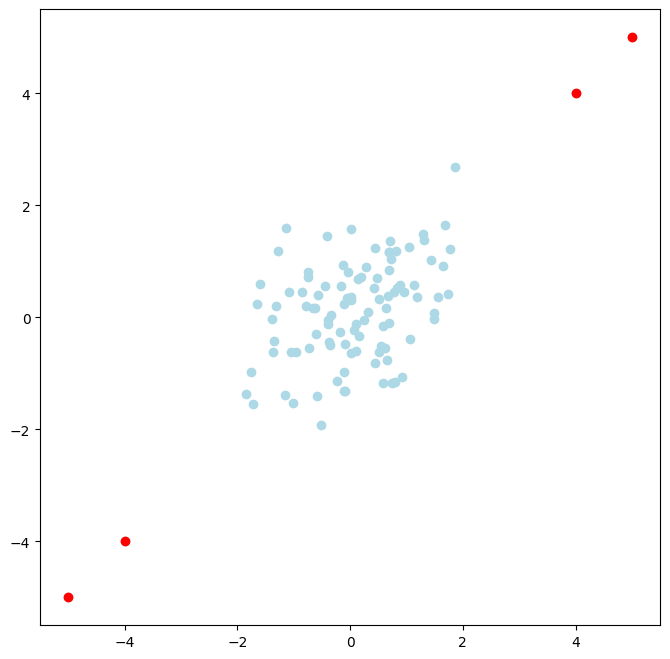

In [4]:
# Scaling the eigenvectors for a longer visual representation

scale_factor = 3  # Increase length for visualization purposes

eigenvector_1 = eigenvectors[:, 0] * scale_factor

eigenvector_2 = eigenvectors[:, 1] * scale_factor



# Plotting the original data along with the scaled eigenvectors

plt.figure(figsize=(8, 8))

plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Original Data')

plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')



# Plotting the scaled eigenvectors

plt.quiver(*origin, *eigenvector_1, scale=1, scale_units='xy', color='orange', width=0.02, label='First Eigenvector (Scaled)')

plt.quiver(*origin, *eigenvector_2, scale=1, scale_units='xy', color='purple', width=0.02, label='Second Eigenvector (Scaled)')



# Adding labels and legend

plt.title("Original Data with Scaled Eigenvectors")

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")

plt.legend()

plt.axis('equal')

plt.show()

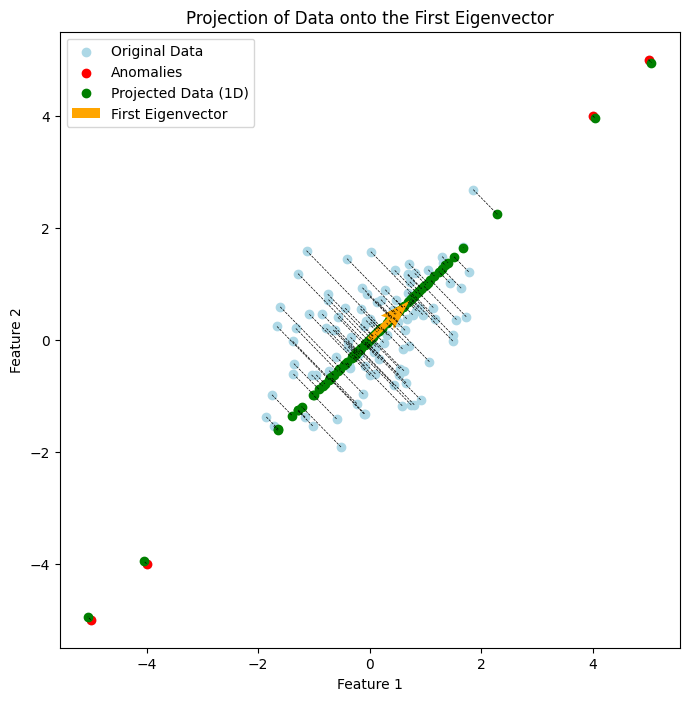

In [ ]:
# Selecting the first eigenvector for projection

first_eigenvector = eigenvectors[:, 0].reshape(-1, 1)



# Projecting data onto the first eigenvector

projected_data_1D = data @ first_eigenvector



# Converting the projected 1D data back to 2D for visualization

# by scaling it along the first eigenvector direction

projected_data_2D = projected_data_1D * first_eigenvector.T



# Plotting the original data, anomalies, and the projected data

plt.figure(figsize=(8, 8))

plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Original Data')

plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies')

plt.scatter(projected_data_2D[:, 0], projected_data_2D[:, 1], color='green', label='Projected Data (1D)')



# Drawing lines from original data points to their projections

for i in range(len(data)):

    plt.plot([data[i, 0], projected_data_2D[i, 0]], [data[i, 1], projected_data_2D[i, 1]], 'k--', linewidth=0.5)



# Plotting the direction of the first eigenvector

origin = np.array([0, 0])

plt.quiver(*origin, *first_eigenvector.flatten(), scale=1, scale_units='xy', color='orange', width=0.01, label='First Eigenvector')



# Adding labels and legend

plt.title("Projection of Data onto the First Eigenvector")

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")

plt.legend()

plt.axis('equal')

plt.show()

In [ ]:

# Step 3: Project each data point onto the principal directions (eigenvectors)
projected_data = data @ eigenvectors
projected_data

array([[-6.07283718e-01, -1.04174946e-01],
       [-8.04561492e-01,  1.06852302e+00],
       [ 2.88507420e-01, -1.62527630e-01],
       [-1.93974564e+00,  5.22239962e-01],
       [ 5.70910269e-01,  3.89687649e-01],
       [ 5.71008362e-01, -3.23319485e-01],
       [-2.82064390e-01, -1.35594209e+00],
       [ 2.11665807e+00, -3.75305942e-01],
       [ 1.23804846e+00,  2.35270077e-01],
       [ 1.12256306e+00, -9.86871131e-01],
       [-1.79326319e+00, -1.78561121e-01],
       [-7.20804483e-02, -1.00826494e+00],
       [ 6.65866112e-01,  8.54579286e-02],
       [ 1.40679478e+00,  2.80503585e-01],
       [ 7.37762508e-01, -1.98492713e-01],
       [ 7.23089643e-01,  1.31745394e+00],
       [ 2.44136973e-02, -7.47698762e-01],
       [-9.98251774e-01, -8.73838202e-01],
       [-2.41183427e-01, -1.38831555e+00],
       [ 1.62513131e+00,  1.56341527e-01],
       [-9.05660250e-01,  1.11635080e-01],
       [ 1.43876136e-01, -2.11407576e-01],
       [ 1.81607719e+00, -4.89890205e-01],
       [ 5.

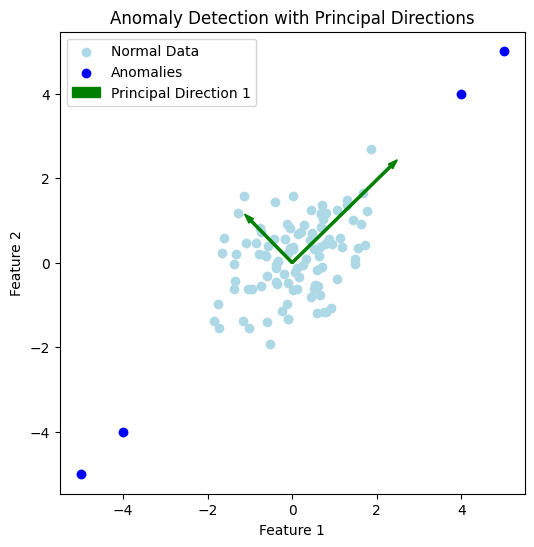

In [ ]:

# Calculate Mahalanobis distance from the mean in the projected space
mean_projection = np.mean(projected_data, axis=0)
deviation = projected_data - mean_projection
distances = np.sqrt((deviation ** 2).sum(axis=1))

# Set a threshold for anomaly detection (e.g., points beyond 2 standard deviations are considered anomalies)
threshold = np.mean(distances) + 2 * np.std(distances)
anomalies = data[distances > threshold]

# Plot normal data, anomalies, and principal directions
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Normal Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='blue', label='Anomalies')
for i in range(len(eigenvalues)):
    # Plot eigenvectors scaled by the square root of eigenvalues for visualization
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 2
    plt.arrow(0, 0, vec[0], vec[1], color='green', width=0.05, label=f'Principal Direction {i+1}' if i == 0 else "")
plt.title("Anomaly Detection with Principal Directions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis('equal')
plt.show()